<a href="https://colab.research.google.com/github/Smarth2005/Hugging-Face-Projects/blob/main/Image%20Classification%20using%20Hugging%20Face%20ViT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Hugging Face 🤗+ Computer Vision - Google's Vision Transformer (ViT) : Image Classification

In [ ]:
!pip install git+https://github.com/huggingface/transformers.git

  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-a7lyid41
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-a7lyid41
  Resolved https://github.com/huggingface/transformers.git to commit cd22550692cabffb037b7e5a956e8da3cbbb2b67
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.56.0.dev0-py3-none-any.whl size=12431919 sha256=04258bda739c1b6c2606e0bd831100884d4b02a932996cbec1129864dcb1660a
  Stored in directory: /tmp/pip-ephem-wheel-cache-ntfy8kzw/wheels/32/4b/78/f195c684dd3a9ed21f3b39fe8f85b48df7918581b6437be143
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.55.1
    Uninstalling transformers-4.55.1:
      Successfully uninstalled transformers-4.55.1


In [ ]:
from transformers import pipeline
from PIL import Image
import requests
from io import BytesIO

# Load Hugging Face classifier (only once)
classifier = pipeline("image-classification", model="google/vit-base-patch16-224")

def classify_image(input_path=None, url=None, top_k=3, show_image=True, display_size=(300,300)):
    """
    Classify an image either from local file or URL using Hugging Face ViT.
    Parameters:
        input_path (str): local path to image
        url (str): direct image url
        top_k (int): number of top predictions to show
        show_image (bool): whether to display image (works in notebooks)
        display_size (tuple): width, height for displaying image
    """
    if url:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
    elif input_path:
        img = Image.open(input_path)
    else:
        raise ValueError("Please provide either input_path or url")

    # Run classification
    results = classifier(img, top_k=top_k)

    # Resize image for display only
    if show_image:
        try:
            from IPython.display import display
            img_resized = img.copy()
            img_resized.thumbnail(display_size)
            display(img_resized)
        except ImportError:
            img.show()  # fallback for .py script

    print("Predictions:")
    for res in results:
        print(f"{res['label']}: {res['score']:.4f}")


Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cpu


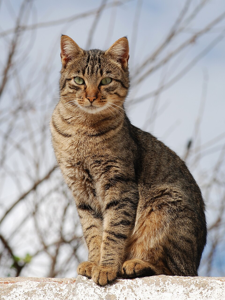

Predictions:
Egyptian cat: 0.3816
tabby, tabby cat: 0.3324
tiger cat: 0.2797


In [ ]:
classify_image(url="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Cat_November_2010-1a.jpg/960px-Cat_November_2010-1a.jpg")

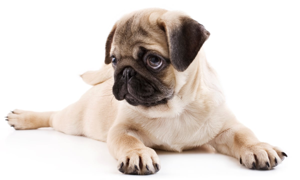

Predictions:
pug, pug-dog: 0.6377
bull mastiff: 0.1586
Labrador retriever: 0.0440


In [ ]:
classify_image(url="https://i.guim.co.uk/img/media/fe1e34da640c5c56ed16f76ce6f994fa9343d09d/0_174_3408_2046/master/3408.jpg?width=1200&quality=85&auto=format&fit=max&s=1aaf31e276b20b5d12d4bee49c5a99e2")

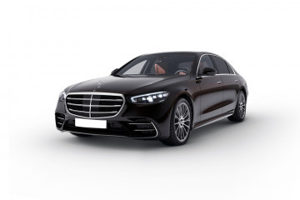

Predictions:
car wheel: 0.3875
grille, radiator grille: 0.2983
sports car, sport car: 0.0798


In [ ]:
classify_image(url="https://media.zigcdn.com/media/model/2021/Oct/s-class_360x240.jpg")

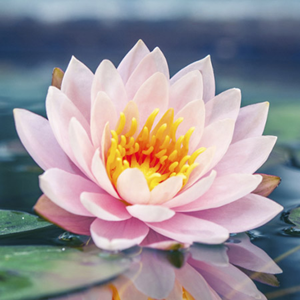

Predictions:
tray: 0.0683
vase: 0.0460
pot, flowerpot: 0.0230


In [ ]:
classify_image(url="https://images.contentstack.io/v3/assets/bltcedd8dbd5891265b/blt5f18c2119ce26485/6668df65db90945e0caf9be6/beautiful-flowers-lotus.jpg?q=70&width=3840&auto=webp")

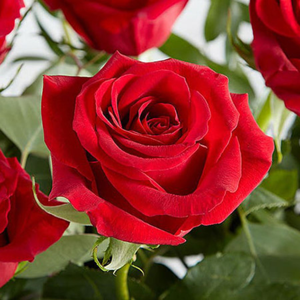

Predictions:
vase: 0.2611
picket fence, paling: 0.2284
greenhouse, nursery, glasshouse: 0.1223


In [ ]:
classify_image(url="https://images.contentstack.io/v3/assets/bltcedd8dbd5891265b/blt134818d279038650/6668df6434f6fb5cd48aac34/beautiful-flowers-rose.jpeg?q=70&width=3840&auto=webp")

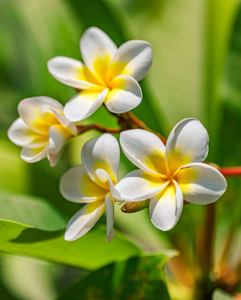

Predictions:
pot, flowerpot: 0.0137
bell cote, bell cot: 0.0090
daisy: 0.0085


In [ ]:
classify_image(url="https://hips.hearstapps.com/hmg-prod/images/flower-frangipani-67ab6b7382454.jpg?crop=0.535xw:1.00xh;0.359xw,0&resize=980:*")

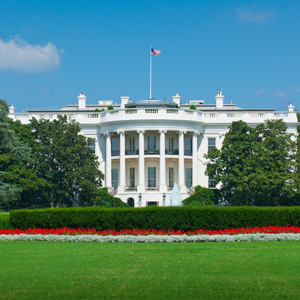

Predictions:
palace: 0.7826
library: 0.0466
flagpole, flagstaff: 0.0390


In [ ]:
classify_image(url="https://hips.hearstapps.com/hmg-prod/images/white-house-royalty-free-image-1610512078.?crop=0.69553xw:1xh;center,top&resize=1120:*")

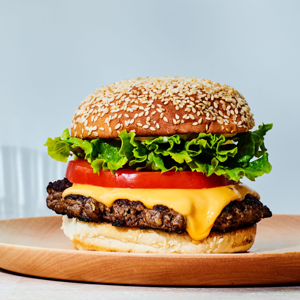

Predictions:
cheeseburger: 0.9977
meat loaf, meatloaf: 0.0003
plate: 0.0002


In [ ]:
classify_image(url="https://assets.epicurious.com/photos/5c745a108918ee7ab68daf79/1:1/w_2503,h_2503,c_limit/Smashburger-recipe-120219.jpg")

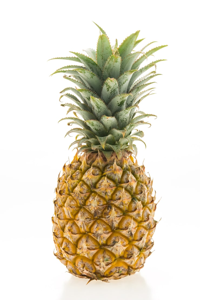

Predictions:
pineapple, ananas: 0.9986
banana: 0.0004
strawberry: 0.0002


In [ ]:
classify_image(url="https://img.freepik.com/free-photo/pineapple-fruit_1203-7746.jpg?semt=ais_hybrid&w=740&q=80")

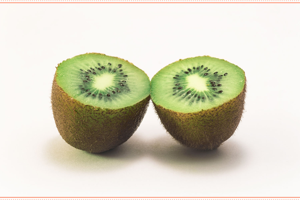

Predictions:
Granny Smith: 0.3894
lemon: 0.1271
strawberry: 0.1003


In [ ]:
classify_image(url="https://images.contentstack.io/v3/assets/bltcedd8dbd5891265b/blt48088d374f43008d/665640cc84249f24714a4510/types-of-fruit-kiwi.jpg?q=70&width=3840&auto=webp")

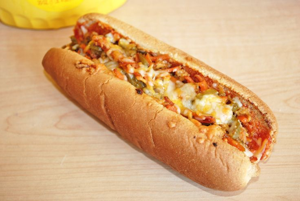

Predictions:
hotdog, hot dog, red hot: 0.9426
French loaf: 0.0444
spaghetti squash: 0.0037


In [ ]:
classify_image(url="https://i.pinimg.com/736x/cc/2e/01/cc2e01fbc23c05e5ee817dbd3d337afd.jpg")

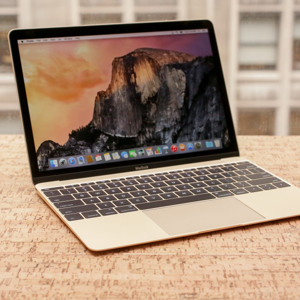

Predictions:
notebook, notebook computer: 0.8538
desktop computer: 0.0538
laptop, laptop computer: 0.0405


In [ ]:
classify_image(url="https://www.cnet.com/a/img/resize/9bb401cd904e9ae8ee3fce8827a4a341ad7e7c3d/hub/2015/04/07/b35f1174-696c-4d25-8a4f-fa16a2842338/macbook-air-gold-2015-16.jpg?auto=webp&fit=crop&height=1200&width=1200")